### Ejemplo de una relación exponencial 

$Y=θ_0​e^{θ_1​X}e^ε$

que se linealiza con:

$ln(Y)=ln(θ_0​)+θ_1​X+ε$


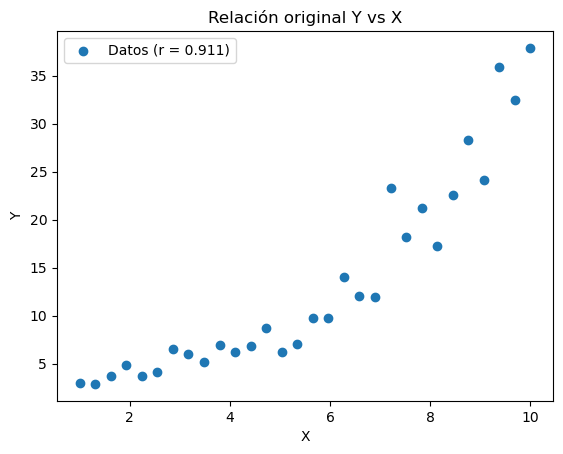

Correlación original entre X y Y: 0.911


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr

# ------------------------------
# 1. Simulación de datos
# ------------------------------
np.random.seed(42)
X = np.linspace(1, 10, 30)
theta0, theta1 = 2.0, 0.3  # parámetros reales
Y = theta0 * np.exp(theta1 * X) * np.exp(np.random.normal(0, 0.2, len(X)))

# ------------------------------
# 2. Gráfica y correlación originales
# ------------------------------
r_original, _ = pearsonr(X, Y)
plt.scatter(X, Y, label=f"Datos (r = {r_original:.3f})")
plt.title("Relación original Y vs X")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

print(f"Correlación original entre X y Y: {r_original:.3f}")




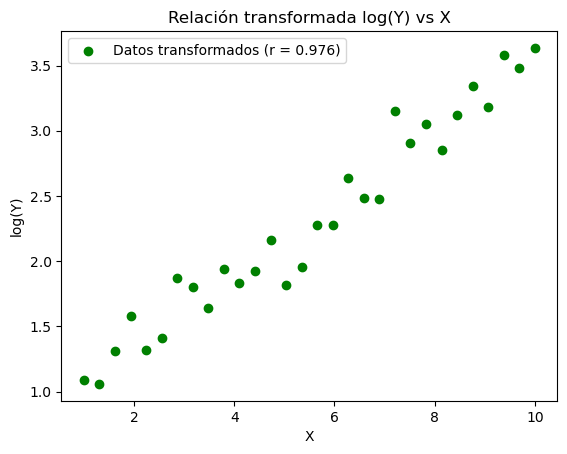

Correlación después de log(Y): 0.976
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     562.7
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           4.42e-20
Time:                        18:05:48   Log-Likelihood:                 11.270
No. Observations:                  30   AIC:                            -18.54
Df Residuals:                      28   BIC:                            -15.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

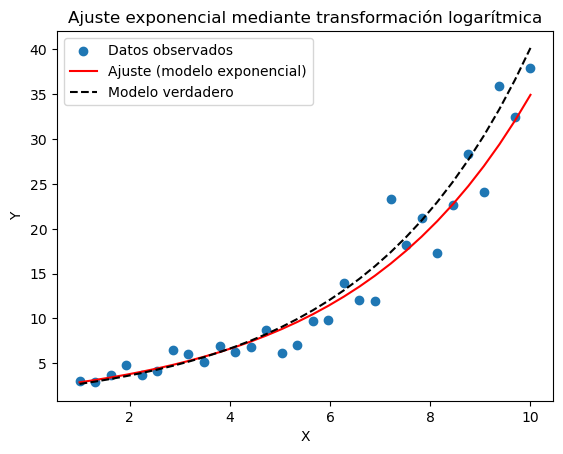

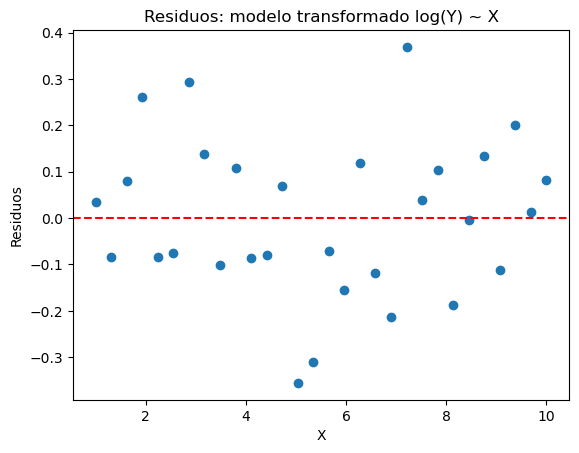

In [8]:
# ------------------------------
# 4. Transformación logarítmica
# ------------------------------
Y_log = np.log(Y)

r_trans, _ = pearsonr(X, Y_log)
plt.scatter(X, Y_log, color="green", label=f"Datos transformados (r = {r_trans:.3f})")
plt.title("Relación transformada log(Y) vs X")
plt.xlabel("X")
plt.ylabel("log(Y)")
plt.legend()
plt.show()

print(f"Correlación después de log(Y): {r_trans:.3f}")

# ------------------------------
# 5. Ajuste lineal en escala transformada
# ------------------------------
X_design = sm.add_constant(X)  # agrega columna de 1s
modelo = sm.OLS(Y_log, X_design).fit()

print(modelo.summary())

# ------------------------------
# 6. Recuperar parámetros originales
# ------------------------------
beta0, beta1 = modelo.params
theta0_hat = np.exp(beta0)
theta1_hat = beta1

print(f"Estimación θ0: {theta0_hat:.3f}")
print(f"Estimación θ1: {theta1_hat:.3f}")

# ------------------------------
# 7. Graficar ajuste en los datos originales
# ------------------------------
Y_pred = theta0_hat * np.exp(theta1_hat * X)

plt.scatter(X, Y, label="Datos observados")
plt.plot(X, Y_pred, color="red", label="Ajuste (modelo exponencial)")
plt.plot(X, theta0*np.exp(theta1*X), color="black", linestyle="--", label="Modelo verdadero")
plt.title("Ajuste exponencial mediante transformación logarítmica")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# ------------------------------
# 8. Residuos del modelo transformado
# ------------------------------
residuos_trans = Y_log - modelo.fittedvalues
plt.scatter(X, residuos_trans)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuos: modelo transformado log(Y) ~ X")
plt.xlabel("X")
plt.ylabel("Residuos")
plt.show()